# Data Story Submission

In this notebook, I conduct some exploratory data analysis to form some initial insights into the dataset.  As a reminder, the goal of this project is to build a model that can accurately identify the circumstances upon which a pitcher is most likely going to throw a fastball in a baseball game.  The dataset contains statistical data of every pitch thrown in the 2015 - 2018 Major League Baseball seasons.

I have previously cleaned the data and saved it as a new flat file `'df_final.csv'`.  I will first import the needed packages and load the file into the `df` variable for analysis.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 500

In [3]:
df = pd.read_csv('df_final.csv', index_col=0)

C:\Users\Owner\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df.describe()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,batter_id,g_id,inning,o,p_score,pitcher_id,p_throws_num,stand_num,top_num,type_B,type_S,type_X,fastball,fastball_more,px_prev,pz_prev,pitch_count
count,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.865071e+06,2.865071e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.867154e+06,2.852965e+06,2.867154e+06,2.852965e+06,2.852965e+06,2.853012e+06,2.853012e+06,2.852965e+06,2.852965e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06
mean,6.572638e-03,2.254938e+00,8.838124e+01,8.136273e+01,1.731173e+03,1.802308e+02,5.848094e+00,6.522622e+00,2.381685e+01,-2.308512e+00,2.649175e+01,-2.278275e+01,1.566689e+00,3.435719e+00,1.550896e+00,2.282811e+00,-1.288567e+02,-4.420795e+00,1.159975e+02,-7.189111e-01,1.758503e+02,5.000000e+01,5.814139e+00,-1.139971e+00,5.046326e+00,4.442669e+01,9.819750e+00,3.129711e+02,2.256608e+00,2.016606e+09,8.824259e-01,8.810873e-01,9.826033e-01,2.894472e+00,3.018314e-01,1.860451e-01,9.595543e-02,5.202658e+05,2.016525e+08,5.006868e+00,1.673523e+00,2.293307e+00,5.274988e+05,7.319575e-01,5.809416e-01,5.090396e-01,3.645169e-01,4.565032e-01,1.789799e-01,3.539667e-01,5.240793e-01,1.043356e-02,1.664336e+00,9.248165e+00
std,8.905373e-01,9.440522e-01,6.000716e+00,5.350838e+00,6.810606e+02,6.726154e+01,2.437567e+01,2.863161e+00,6.446540e-02,1.074066e+01,4.142729e+00,8.865066e+00,1.549407e-01,2.172590e-01,5.537377e-01,5.990039e+00,8.726126e+00,3.067389e+00,3.409448e+01,1.728592e+00,2.960411e+01,3.118284e-14,4.578852e-01,6.275731e+00,5.187005e+00,1.683662e+01,4.060956e+00,1.928482e+02,2.550955e+00,1.117238e+06,9.665457e-01,8.251786e-01,8.174947e-01,1.726595e+00,4.590526e-01,3.891431e-01,2.945302e-01,8.121276e+04,1.115803e+05,2.669174e+00,9.528891e-01,2.633267e+00,7.752456e+04,4.429399e-01,4.934051e-01,4.999184e-01,4.812945e-01,4.981045e-01,3.833356e-01,4.781991e-01,4.994199e-01,8.093671e-01,1.305596e+00,6.359738e+00
min,-1.054333e+01,-5.183664e+00,3.390000e+01,3.240000e+01,1.214000e+00,-2.000000e-03,-9.000000e+01,1.000000e-01,2.330000e+01,-5.929009e+01,-5.243748e-01,-7.717142e+01,-7.921409e+00,-1.849129e+00,0.000000e+00,-2.486900e+01,-1.533620e+02,-1.977060e+01,0.000000e+00,-9.556000e+00,0.000000e+00,5.000000e+01,-1.941000e+00,-2.809165e+01,-7.020600e+01,0.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,2.015000e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.125260e+05,2.015000e+08,1.000000e+00,0.000000e+00,0.000000e+00,1.125260e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.054333e+01,-5.183664e+00,1.000000e+00
25%,-5.878259e-01,1.653958e+00,8.430000e+01,7.800000e+01,1.242986e+03,1.374250e+02,-1.180000e+01,4.300000e+00,2.380000e+01,-1.129000e+01,2.346000e+01,-2.871775e+01,1.485351e+00,3.300000e+00,9.060000e-01,-2.081861e+00,-1.355100e+02,-6.513000e+00,9.342000e+01,-1.955000e+00,1.606500e+02,5.000000e+01,5.564194e+00,-6.450000e+00,2.160000e+00,3.200000e+01,6.000000e+00,1.490000e+02,0.000000e+00,2.016004e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.577270e+05,2.016000e+08,3.000000e+00,1.000000e+00,0.000000e+00,4.621360e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.880000e-01,0.000000e+00,4.000000e+00
50%,7.660961e-03,2.253282e+00,8.970000e+01,8.2

In [5]:
df.columns

Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b', 'batter_id', 'event', 'g_id',
       'inning', 'o', 'p_score', 'p_throws', 'pitcher_id', 'stand', 'top',
       'p_throws_num', 'stand_num', 'top_num', 'type_B', 'type_S', 'type_X',
       'fastball', 'fastball_more', 'pitch_type_prev', 'px_prev', 'pz_prev',
       'pitch_count'],
      dtype='object')

As demonstrated above, the dataset has many features to explore.  The dataset has a number of continuous variables documenting, among other things, each pitch's speed, location, spin/rotation, and movement.  The dataset also provides some categorical variables regarding each pitch, including the inning of the game, the current score for each team, the number of outs, the current batting count, whether any runners are on base, the pitch sequence number of the current at-bat, and the dominant hand of both the pitcher and batter.  I will start by examining some of the continuous variables.

# *Continuous Variables*

### Pitch Speed

I start with the most basic hypothesis.  By its very nature, a 'fastball' is labeled as such because it is the pitch that is supposed to have the highest velocity.  Therefore, logic dictates that the pitches labeled as 'fastballs' in the dataset will have higher velocity data than the other pitches.  Let's see if that quite straightforward hypothesis is accurate.

<Figure size 1008x288 with 0 Axes>

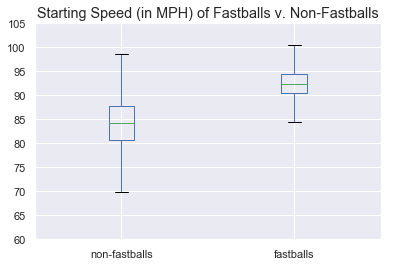

In [6]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = df[['fastball_more', 'start_speed']].boxplot(by = 'fastball_more', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Starting Speed (in MPH) of Fastballs v. Non-Fastballs', size='large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)
_ = plt.ylim((60, 105))


<Figure size 1008x288 with 0 Axes>

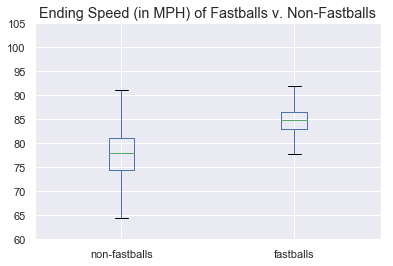

In [7]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = df[['fastball_more', 'end_speed']].boxplot(by = 'fastball_more', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Ending Speed (in MPH) of Fastballs v. Non-Fastballs', size='large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)
_ = plt.ylim((60, 105))

As suspected, the 'fastballs' have a higher velocity at both the start of the pitch as well as when it reaches the batter.  If nothing else, this confirms the integrity of the data - it would have raised significant concerns about the reliability of the dataset if this were not the case.

### Pitch Movement

Another classic attribute of a traditional four-seam 'fastball' is that it travels on a straight trajectory.  (It should be noted that I have only labeled four-seam fastballs as 'fastballs' for the purpose of this analysis.  The dataset also contains two-seam fastballs, but I have elected not to include those in the 'fastball' label because a two-seam fastball rotates unevenly and picks up increased movement as it approaches the batter.  Two-seam fastballs therefore have attributes much more consistent with the other types of breaking ball pitches notwithstanding being referred to as a kind of fastball).

Accordingly, the expectation is that the 'fastball' pitches will have less movement (or 'break' in baseball parlance) on average than the 'non-fastballs.'  Let's see if this theory holds water:

<Figure size 1008x288 with 0 Axes>

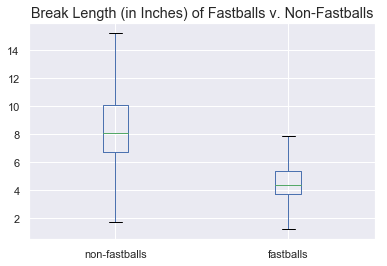

In [8]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = df[['fastball_more', 'break_length']].boxplot(by = 'fastball_more', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Break Length (in Inches) of Fastballs v. Non-Fastballs', size='large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)

<Figure size 1008x288 with 0 Axes>

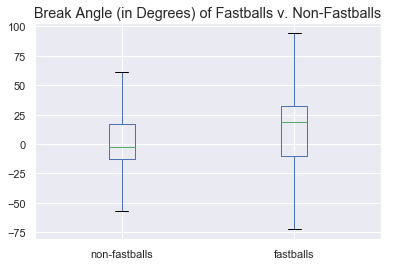

In [9]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = df[['fastball_more', 'break_angle']].boxplot(by = 'fastball_more', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Break Angle (in Degrees) of Fastballs v. Non-Fastballs', size = 'large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)

As demonstrated by the break length data, the 'fastballs' move significantly less than the 'non-fastballs.'  Interestingly, both the 'fastballs' and 'non-fastballs' appear to have fairly comparable break angle profiles.  However, our movement theory appears to be confirmed by the break length data for the pitches.

### Pitch Location

Unlike the previous two characteristics, I am less certain as to what correlation (if any at all) there will be between 'fastballs' and pitch location.  Breaking balls do tend to move downwards due to their decreased velocity, however, so it is possible that the 'fastballs' will have a slightly higher average vertical location.  Let's see what the data shows:

<Figure size 1008x288 with 0 Axes>

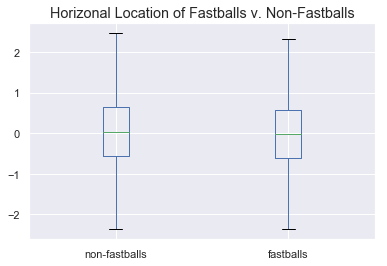

In [10]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))

_ = df[['fastball_more', 'px']].boxplot(by = 'fastball_more', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Horizonal Location of Fastballs v. Non-Fastballs', size='large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)


<Figure size 1008x288 with 0 Axes>

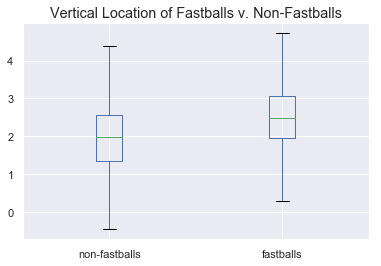

In [11]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))

_ = df[['fastball_more', 'pz']].boxplot(by = 'fastball_more', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Vertical Location of Fastballs v. Non-Fastballs', size='large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)


As suspected, there does not appear to be a significant difference in pitch location between the 'fastballs' and 'non-fastballs' horizontally.  It does appear, however, that 'fastballs' have a slightly higher veritical location than 'non-fastballs' on average.

### Spin Rate/Direction

Spin rate is a relatively newly-observed (and trendy) statistic in baseball that tracks the revolutions per minute of a pitch.  It is generally understood that the highest velocity pitches will have the highest spin rates, so I expect the spin rates for the 'fastballs' to be higher than the spin rates for the 'non-fastballs.'  As for spin direction, the nature of a four-seam fastball is to rotate with back spin, so I would expect the spin direction of the 'fastballs' to be much more consistent than of the 'non-fastballs.' Let's see:

<Figure size 1008x288 with 0 Axes>

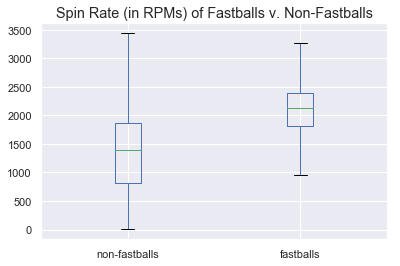

In [12]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = df[['fastball_more', 'spin_rate']].boxplot(by = 'fastball_more', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Spin Rate (in RPMs) of Fastballs v. Non-Fastballs', size='large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)

<Figure size 1008x288 with 0 Axes>

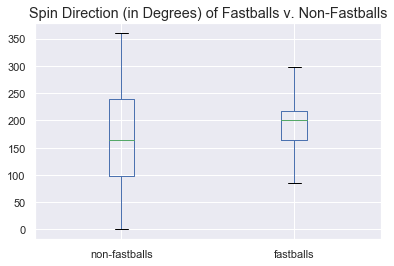

In [13]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = df[['fastball_more', 'spin_dir']].boxplot(by = 'fastball_more', showfliers=False).set_xticklabels(['non-fastballs', 'fastballs'])
_ = plt.title('Spin Direction (in Degrees) of Fastballs v. Non-Fastballs', size='large')
_ = plt.xlabel(None)
_ = plt.ylabel(None)
_ = plt.suptitle(None)

As predicted, the average spin rate for 'fastballs' is significantly higher than that of the 'non-fastballs.'  Moreover, the spin direction for 'fastballs' is relatively centered on 180 degrees (back-spin), whereas the 'non-fastballs' spin direction encompasses a much wider range.

# *Categorical Variables*

In order to accurately evaluate the various categorical variables, I first need to identify a baseline percentage regarding how often a pitcher throws a fastball.  This can be done by calculating the percentage of pitches that are labeled as a 'fastball' in the entire dataset:

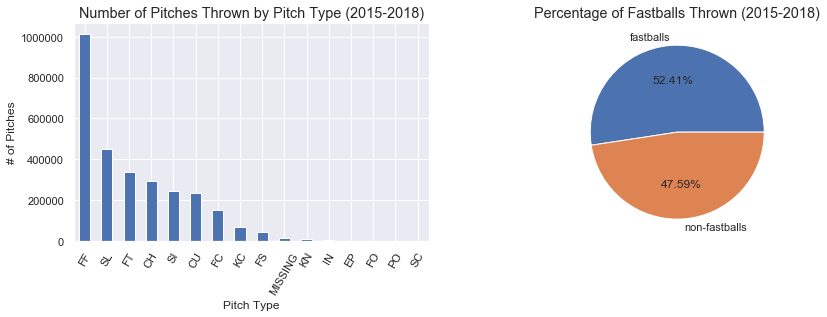

In [18]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = plt.subplot(1,2,1)
_ = df['pitch_type'].value_counts().plot.bar()
_ = plt.title('Number of Pitches Thrown by Pitch Type (2015-2018)', size='large')
_ = plt.xlabel('Pitch Type')
_ = plt.ylabel('# of Pitches')
_ = plt.xticks(rotation=60)

_ = plt.subplot(1,2,2)
_ = df['fastball_more'].value_counts().plot.pie(labels=['fastballs', 'non-fastballs'], autopct='%.2f%%')
_ = plt.title('Percentage of Fastballs Thrown (2015-2018)', size='large')
_ = plt.ylabel(None)

In [17]:
df['fastball_more'].value_counts()

1    1502616
0    1364538
Name: fastball_more, dtype: int64

As the bar graph demonstrates, the four-seam fastball is by far the most common pitch type in baseball, having been thrown approximately twice as often as the next most popular pitch.  The pie chart indicates that four-seam fastballs were thrown a whopping 35.40% of the time during the 2015-2018 seasons.  This certainly highlights the value of this exercise - a model that can accurately predict fastball usage would be effective in roughly one out of every three pitches.

I can use this number as a baseline when analyzing the various categorical data variables.  A variable is not overly significant to the extent that it correlates to a fastball usage at or around that same 35.40% frequency - the goal is to identify the circumstances in which that frequency increases (or decreases) materially from that baseline number.

### Runners on Base

One categorical variable that may influence a pitcher's fastball usage is whether there are any runners on base.  Given that fastballs are generally considered the easiest pitch for a batter to hit, it may make sense that a pitcher throws his fastball more often when there are less runners on base (so the resulting hits score less runs).  Alternatively, I would expect a pitcher to throw more fastballs when he cannot afford to walk a batter (most importantly when the bases are loaded).  Let's see if the data uncovers any trends:

In [19]:
df_norunner = df[(df['on_1b'] == 0) & (df['on_2b'] == 0) & (df['on_3b'] == 0)]
df_on_1b = df[(df['on_1b'] == 1) & (df['on_2b'] == 0) & (df['on_3b'] == 0)]
df_on_2b = df[(df['on_1b'] == 0) & (df['on_2b'] == 1) & (df['on_3b'] == 0)]
df_on_3b = df[(df['on_1b'] == 0) & (df['on_2b'] == 0) & (df['on_3b'] == 1)]
df_on_1b2b = df[(df['on_1b'] == 1) & (df['on_2b'] == 1) & (df['on_3b'] == 0)]
df_on_1b3b = df[(df['on_1b'] == 1) & (df['on_2b'] == 0) & (df['on_3b'] == 1)]
df_on_2b3b = df[(df['on_1b'] == 0) & (df['on_2b'] == 1) & (df['on_3b'] == 1)]
df_allrunner = df[(df['on_1b'] == 1) & (df['on_2b'] == 1) & (df['on_3b'] == 1)]


In [20]:
runners_list = [df_norunner, df_on_1b, df_on_2b, df_on_3b, df_on_1b2b, df_on_1b3b, df_on_2b3b, df_allrunner]
runners_data = []
for i in range(len(runners_list)):
    runners_data.append(np.sum(runners_list[i]['fastball_more']) / len(runners_list[i]))
print(runners_data)

[0.53086799452936229, 0.5460058961258093, 0.4785657024063481, 0.48213605960084832, 0.50518609543248705, 0.5012471291334305, 0.4455758490023885, 0.52722901963201529]


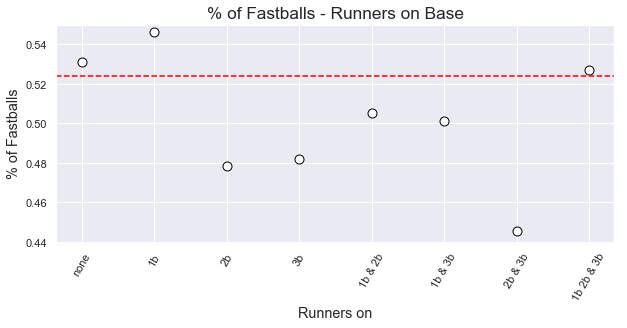

In [22]:
_ = sns.set()
_ = plt.figure(figsize=(10,4))
_ = plt.plot(np.arange(len(runners_data)), runners_data, marker='o', linestyle='none', ms=9, mfc='white', mec='black')
_ = plt.title('% of Fastballs - Runners on Base', size='x-large')
_ = plt.xlabel('Runners on', size='large')
_ = plt.ylabel('% of Fastballs', size='large')
_ = plt.xticks(np.arange(len(runners_data)), ['none', '1b', '2b', '3b', '1b & 2b', '1b & 3b', '2b & 3b', '1b 2b & 3b'], rotation=60)
_ = plt.axhline(.5241, color='red', linestyle='--')
_ = plt.ylim((.44, .55))

It appears that the most significant influence on fastball usage is whether there is at least one runner in scoring position (on second or third base).  Fastball usage dips to 32-33% when at least one runner is in scoring position and all the way down to 30% when runners are on second and third (with first base open).  The fastball usage spikes back up to 36% when the bases are loaded, however, likely because a walk in those circumstances results in a run scored.

### Batting Count

Another categorical variable that may be correlative to fastball usage is the current batting count on the hitter.  I would surmise that a pitcher is more likely to throw his fastball when he is "behind" in the count (i.e., more balls than strikes) as he is trying to avoid walking the batter.  Conversely, I would expect less fastballs when he is "ahead" in the count (i.e., more strikes than balls) and has more freedom to miss the strike zone.  Here is the data:

In [23]:
df_0_0 = df[(df['b_count'] == 0) & (df['s_count'] == 0)]
df_0_1 = df[(df['b_count'] == 0) & (df['s_count'] == 1)]
df_0_2 = df[(df['b_count'] == 0) & (df['s_count'] == 2)]
df_1_0 = df[(df['b_count'] == 1) & (df['s_count'] == 0)]
df_1_1 = df[(df['b_count'] == 1) & (df['s_count'] == 1)]
df_1_2 = df[(df['b_count'] == 1) & (df['s_count'] == 2)]
df_2_0 = df[(df['b_count'] == 2) & (df['s_count'] == 0)]
df_2_1 = df[(df['b_count'] == 2) & (df['s_count'] == 1)]
df_2_2 = df[(df['b_count'] == 2) & (df['s_count'] == 2)]
df_3_0 = df[(df['b_count'] == 3) & (df['s_count'] == 0)]
df_3_1 = df[(df['b_count'] == 3) & (df['s_count'] == 1)]
df_3_2 = df[(df['b_count'] == 3) & (df['s_count'] == 2)]

In [24]:
count_list = [df_0_0, df_0_1, df_0_2, df_1_0, df_1_1, df_1_2, df_2_0, df_2_1, df_2_2, df_3_0, df_3_1, df_3_2]
count_data = []
for i in range(len(count_list)):
    count_data.append(np.sum(count_list[i]['fastball_more']) / len(count_list[i]))
print(count_data)

[0.55815605998586948, 0.48348919676952473, 0.45932137412008955, 0.54695891951957309, 0.47945308365908201, 0.43763231464884522, 0.64515048189684054, 0.55715351157986448, 0.46801969351213957, 0.73835669434276696, 0.70671894096919097, 0.58476357772274379]


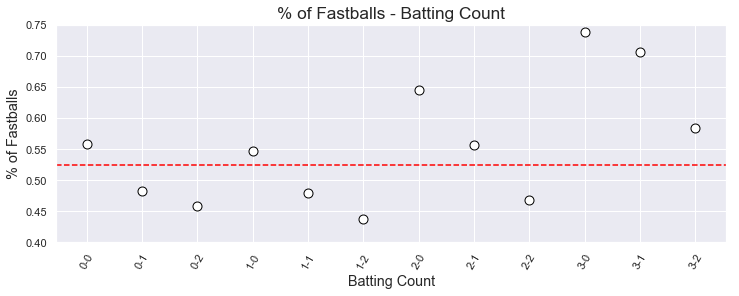

In [25]:
_ = sns.set()
_ = plt.figure(figsize=(12,4))
_ = plt.plot(np.arange(len(count_data)), count_data, marker='o', linestyle='none', ms=9, mfc='white', mec='black')
_ = plt.title('% of Fastballs - Batting Count', size='x-large')
_ = plt.xlabel('Batting Count', size='large')
_ = plt.ylabel('% of Fastballs', size='large')
_ = plt.xticks(np.arange(len(count_data)), ['0-0', '0-1', '0-2', '1-0', '1-1', '1-2', '2-0', '2-1', '2-2', '3-0', '3-1', '3-2'], rotation=60)
_ = plt.axhline(.5241, color='red', linestyle='--')
_ = plt.ylim((.40, .75))

As expected, the batting count appears to be strongly correlated to fastballs.  A pitcher is much more likely to throw his fastball when he is behind in the count and much less likely to when he is ahead in the count.  Interestingly, however, a pitcher is just over 2% more likely to throw a fastball on the first pitch.  The free swingers will be happy to hear that!

### Outs

Another categorical variable to analyze is the number of outs in the inning.  I suspect that this will be less correlative than some of the other variables:

In [26]:
df['outs'].value_counts()

0    983429
1    950175
2    933550
Name: outs, dtype: int64

In [27]:
df_0outs = df[df['outs'] == 0]
df_1outs = df[df['outs'] == 1]
df_2outs = df[df['outs'] == 2]

In [28]:
outs_list = [df_0outs, df_1outs, df_2outs]
outs_data = []
for i in range(len(outs_list)):
    outs_data.append(np.sum(outs_list[i]['fastball_more']) / len(outs_list[i]))
print(outs_data)

[0.54381150037267556, 0.51983792459283817, 0.50760966204274005]


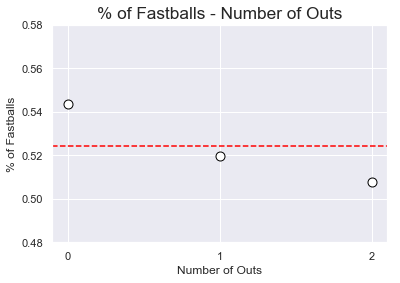

In [29]:
_ = sns.set()
_ = plt.figure(figsize=(6,4))
_ = plt.plot(np.arange(len(outs_data)), outs_data, marker='o', linestyle='none', ms=9, mfc='white', mec='black')
_ = plt.title('% of Fastballs - Number of Outs', size='x-large')
_ = plt.xlabel('Number of Outs')
_ = plt.ylabel('% of Fastballs')
_ = plt.xticks(np.arange(len(outs_data)), ['0', '1', '2'])
_ = plt.axhline(.5241, color='red', linestyle='--')
_ = plt.ylim((.48, .58))

On the whole, it appears that pitchers throw more fastballs than normal with no outs and less fastballs than normal with one or two outs.  The fastball usage frequency does not appear to vary materially between one and two outs.

### Pitch Sequence

Another interesting categorical variable in the dataset is the pitch number for each at-bat.  I would speculate that a pitcher is more likely to throw a fastball on the first pitch as well as progressively more likely once you get to pitch 5 and beyond (to avoid a walk).  Let's check it out:

In [30]:
df_pitch1 = df[df['pitch_num'] == 1]
df_pitch2 = df[df['pitch_num'] == 2]
df_pitch3 = df[df['pitch_num'] == 3]
df_pitch4 = df[df['pitch_num'] == 4]
df_pitch5 = df[df['pitch_num'] == 5]
df_pitch6 = df[df['pitch_num'] == 6]
df_pitch7plus = df[df['pitch_num'] > 6]

In [31]:
pitch_list = [df_pitch1, df_pitch2, df_pitch3, df_pitch4, df_pitch5, df_pitch6, df_pitch7plus]
pitch_data = []
for i in range(len(pitch_list)):
    pitch_data.append(np.sum(pitch_list[i]['fastball_more']) / len(pitch_list[i]))
print(pitch_data)

[0.55815605998586948, 0.51159456606753684, 0.50673537638219845, 0.50739009692966885, 0.51778212035701443, 0.52003410645891068, 0.54035918083002943]


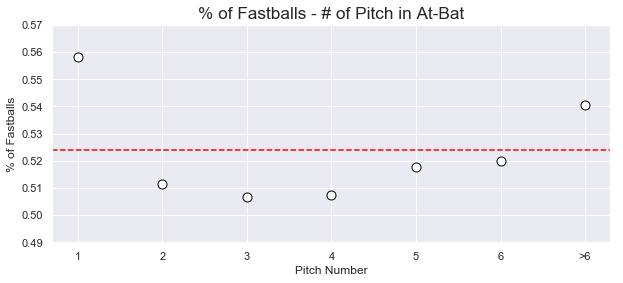

In [32]:
_ = sns.set()
_ = plt.figure(figsize=(10,4))
_ = plt.plot(np.arange(len(pitch_data)), pitch_data, marker='o', linestyle='none', ms=9, mfc='white', mec='black')
_ = plt.title('% of Fastballs - # of Pitch in At-Bat', size='x-large')
_ = plt.xlabel('Pitch Number')
_ = plt.ylabel('% of Fastballs')
_ = plt.xticks(np.arange(len(pitch_data)), ['1', '2', '3', '4', '5', '6', '>6'])
_ = plt.axhline(.5241, color='red', linestyle='--')
_ = plt.ylim((.49, .57))

The data appears to validate this hypothesis.  A pitcher throws his fastball approximately 2% more often on the first pitch and less often than average on pitches 2 and 3.  Pitches 4-6 are approximately at the default average of 35.4% (though increasing slightly at each susequent pitch).  The frequency then increases significantly on pitches 7 and beyond, likely to avoid walking the batter.

This categorical dataset has the potential to be even more significant in a pitch-by-pitch analysis, as it may be that a significant indicator of fastball usage is what type of pitches have been previously thrown during the same at-bat.

### Inning

The inning of the game could also be correlative to fastball usage.  For example, early in the game the starting pitcher may elect to use more fastballs if he perceives that surrendering a home run is less signficant than walking a batter and upping his pitch count.  Fastball usage also could be influenced by relief pitchers entering the games in the later innings, as they tend to have less variety of pitch types in their arsenal and can throw harder given they will be throwing less pitches overall.  Here is the data:

In [33]:
df_first = df[df['inning'] == 1]
df_second = df[df['inning'] == 2]
df_third = df[df['inning'] == 3]
df_fourth = df[df['inning'] == 4]
df_fifth = df[df['inning'] == 5]
df_sixth = df[df['inning'] == 6]
df_seventh = df[df['inning'] == 7]
df_eighth = df[df['inning'] == 8]
df_ninth = df[df['inning'] == 9]
df_extra = df[df['inning'] > 9]

In [34]:
inning_list = [df_first, df_second, df_third, df_fourth, df_fifth, df_sixth, df_seventh, df_eighth, df_ninth, df_extra]
inning_data = []
for i in range(len(inning_list)):
    inning_data.append(np.sum(inning_list[i]['fastball_more']) / len(inning_list[i]))
print(inning_data)

[0.58602136017309003, 0.54601993581915764, 0.51732048417837351, 0.49899914212181873, 0.50073934753767191, 0.49816204051012752, 0.51347054860233554, 0.52169509216283905, 0.53914277186512338, 0.5006379728636895]


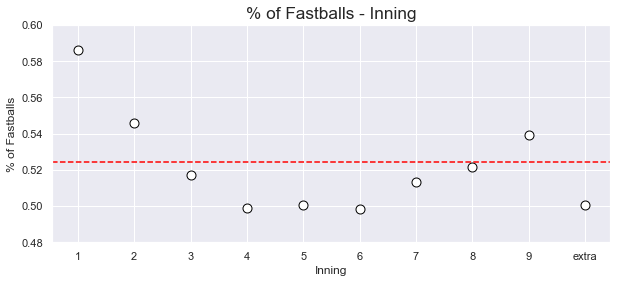

In [35]:
_ = sns.set()
_ = plt.figure(figsize=(10,4))
_ = plt.plot(np.arange(len(inning_data)), inning_data, marker='o', linestyle='none', ms=9, mfc='white', mec='black')
_ = plt.title('% of Fastballs - Inning', size='x-large')
_ = plt.xlabel('Inning')
_ = plt.ylabel('% of Fastballs')
_ = plt.xticks(np.arange(len(inning_data)), ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'extra'])
_ = plt.axhline(.5241, color='red', linestyle='--')
_ = plt.ylim((.48, .60))

Interesting.  The data demonstrates a significant increase in fastball usage in the first inning, followed by a consistent dropoff in usage from the second inning through the sixth inning.  Fastball usage then spikes dramatically in the later innings.  The inning of the game therefore appears to be quite statistically significant (though this also could be tied to whether the starting pitcher has remained in the game).  Perhaps the real conclusion to draw is that starting pitchers throw their fastballs early and then rely on their breaking balls as the game progresses.

### Pitcher/Batter Dominant Hand

Another variable to consider is whether the pitcher and batter are right- or left-handed.  This variable may bear out to be quite significant under certain circumstances, as pitchers often employ different strategies depending on whether the batter is right- or left-handed.  Let's see what the numbers say:

In [66]:
df['p_throws'].value_counts()

R    2098635
L     768519
Name: p_throws, dtype: int64

In [67]:
df['stand'].value_counts()

R    1665649
L    1201505
Name: stand, dtype: int64

In [36]:
df_RvR = df[(df['p_throws'] == 'R') & (df['stand'] == 'R')]
df_LvR = df[(df['p_throws'] == 'L') & (df['stand'] == 'R')]
df_RvL = df[(df['p_throws'] == 'R') & (df['stand'] == 'L')]
df_LvL = df[(df['p_throws'] == 'L') & (df['stand'] == 'L')]

In [37]:
PvB_list = [df_RvR, df_LvR, df_RvL, df_LvL]
PvB_data = []
for i in range(len(PvB_list)):
    PvB_data.append(np.sum(PvB_list[i]['fastball_more']) / len(PvB_list[i]))
print(PvB_data)

[0.52710910954392154, 0.50966883141613062, 0.53277793410585361, 0.50568841314000401]


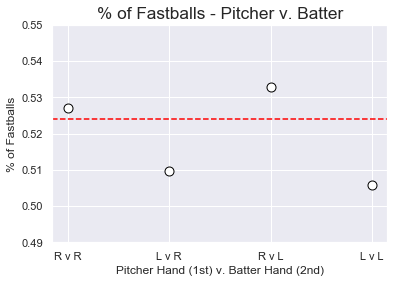

In [38]:
_ = sns.set()
_ = plt.figure(figsize=(6,4))
_ = plt.plot(np.arange(len(PvB_data)), PvB_data, marker='o', linestyle='none', ms=9, mfc='white', mec='black')
_ = plt.title('% of Fastballs - Pitcher v. Batter', size='x-large')
_ = plt.xlabel('Pitcher Hand (1st) v. Batter Hand (2nd)')
_ = plt.ylabel('% of Fastballs')
_ = plt.xticks(np.arange(len(PvB_data)), ['R v R', 'L v R', 'R v L', 'L v L'])
_ = plt.axhline(.5241, color='red', linestyle='--')
_ = plt.ylim((.49, .55))

The main takeaway from this analysis is that right-handed pitchers throw fastballs more often than average and left-handed pitchers throw their fastballs less often than average regardless of the batter.  This seems like a rule of thumb that could come in handy.

### Current Score

In general, I predict that the number of fastballs thrown will directly correlate with the size of the lead by either team.  The reason for this hypothesis is straightforward - the more the outcome of the game becomes settled, the more likely a pitcher will be to just throw fastballs to prevent walks and get the game completed.  Here is the data:

In [39]:
df_tie = df[(df['p_score'] - df['b_score']) == 0]
df_pitcher1 = df[(df['p_score'] - df['b_score']) == 1]
df_pitcher2 = df[(df['p_score'] - df['b_score']) == 2]
df_pitcher3 = df[(df['p_score'] - df['b_score']) == 3]
df_pitcher4 = df[(df['p_score'] - df['b_score']) == 4]
df_pitcher5 = df[(df['p_score'] - df['b_score']) == 5]
df_pitcher6 = df[(df['p_score'] - df['b_score']) == 6]
df_pitcher7 = df[(df['p_score'] - df['b_score']) == 7]
df_pitcher8 = df[(df['p_score'] - df['b_score']) == 8]
df_pitcher9plus = df[(df['p_score'] - df['b_score']) > 8]
df_batter1 = df[(df['b_score'] - df['p_score']) == 1]
df_batter2 = df[(df['b_score'] - df['p_score']) == 2]
df_batter3 = df[(df['b_score'] - df['p_score']) == 3]
df_batter4 = df[(df['b_score'] - df['p_score']) == 4]
df_batter5 = df[(df['b_score'] - df['p_score']) == 5]
df_batter6 = df[(df['b_score'] - df['p_score']) == 6]
df_batter7 = df[(df['b_score'] - df['p_score']) == 7]
df_batter8 = df[(df['b_score'] - df['p_score']) == 8]
df_batter9plus = df[(df['b_score'] - df['p_score']) > 8]

In [40]:
score_list = [df_pitcher9plus, df_pitcher8, df_pitcher7, df_pitcher6, df_pitcher5, df_pitcher4, df_pitcher3, df_pitcher2, df_pitcher1, df_tie, df_batter1, df_batter2, df_batter3, df_batter4, df_batter5, df_batter6, df_batter7, df_batter8, df_batter9plus]
score_data = []
for i in range(len(score_list)):
    score_data.append(np.sum(score_list[i]['fastball_more']) / len(score_list[i]))
print(score_data)

[0.55555898036556417, 0.54266279883965185, 0.53779787677603519, 0.53549848942598188, 0.53353558093564679, 0.53543265084769875, 0.53353777772259714, 0.52850056784020305, 0.52585502475926482, 0.54121982380410005, 0.50921017815552194, 0.5001362339818638, 0.49628746200900242, 0.50255799349881791, 0.51092482193177469, 0.50148450946643719, 0.50920472520445592, 0.50147026791548677, 0.51113211852527951]


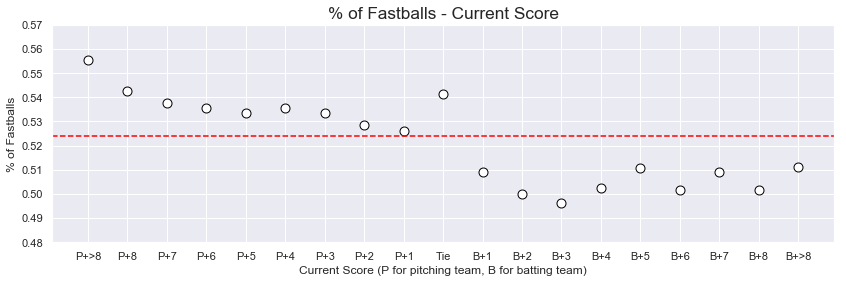

In [41]:
_ = sns.set()
_ = plt.figure(figsize=(14,4))
_ = plt.plot(np.arange(len(score_data)), score_data, marker='o', linestyle='none', ms=9, mfc='white', mec='black')
_ = plt.title('% of Fastballs - Current Score', size='x-large')
_ = plt.xlabel('Current Score (P for pitching team, B for batting team)')
_ = plt.ylabel('% of Fastballs')
_ = plt.xticks(np.arange(len(score_data)), ['P+>8', 'P+8', 'P+7', 'P+6', 'P+5', 'P+4', 'P+3', 'P+2', 'P+1', 'Tie', 'B+1', 'B+2', 'B+3', 'B+4', 'B+5', 'B+6', 'B+7', 'B+8', 'B+>8'])
_ = plt.axhline(.5241, color='red', linestyle='--')
_ = plt.ylim((.48, .57))

The results are quite interesting.  Pitchers appear to throw fastballs in a tie game at a rate of 36%, which is only slightly higher than the defaul 35.4% rate.  The percentage dips slightly when the pitcher has a 1 run lead, but then gradually increases to well above the default rate as the pitcher's lead increases.

If the batting team has a lead of 4 or less runs, however, a pitcher throws fewer than the default fastball rate.  Once the lead increases to 5 or more, then the pitcher changes course and throws above the default rate of fastballs.  It therefore is fair to speculate that teams feel that a game is more or less out of reach once a deficit reaches 5 runs.

# *Conclusions*

Based on the above exploratory data analysis, I have drawn the following conclusions about the dataset:

- The batting count appears to be the most significant indicators of fastballs - batters should expect to face significantly more fastballs when ahead in the count (and a full count) and significantly less when behind in the count


- The break length of a pitch is inversely correlated to fastball likelihood percentage


- A pitch with a high spin rate and spin direction at or near 180 degrees is most likely a fastball


- Pitchers are less likely to throw fastballs with runners in scoring position (unless the bases are loaded)


- Pitchers throw more fastballs when there are no outs in an inning


- Pitchers throw more than an average amount of fastballs in the first, seventh, eighth, ninth, and extra innings.  Pitchers throw less than an average amount of fastballs in the third, fourth, fifth, and sixth innings


- Right-handed pitchers throw significantly more fastballs than left-handed pitchers


- Batters should expect to face less than an average amount of fastballs when their team is winning by 4 or less runs.  Pitchers will gradually throw more fastballs as the pitching team's lead increases or the batting team gets out to a 5 or more run lead


# *Summary*

While I found a number of variables that had some correlation with fastball likelihood percentage, no one single variable appears to be outcome-determinative of when pitchers throw fasballs (even the batting count only moved the percentage by at most a little over 10% from the default fastball rate).  I therefore am optimistic that this data presents the perfect circumstances to build a robust model with high accuracy once all of the variables are analyzed together. 






